# The goal of this analysis is visualize the data and study it. 
<span style="font-size: 20px;"> The main focus being around making more accurate predictions and gain actionable insight.</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [3]:
data = pd.read_csv('./train.csv')
display(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


For starters let's plot out the correlations of all the features and the SalePrice in a heatmap

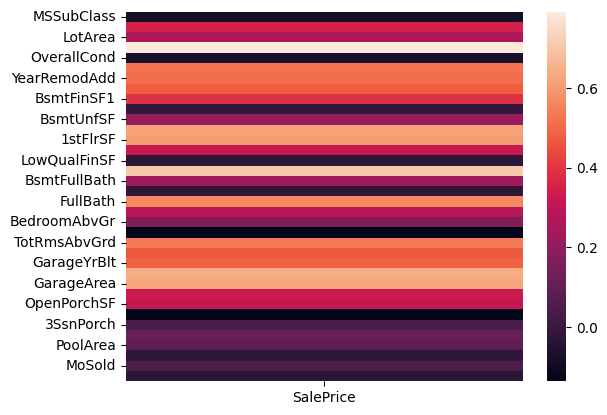

In [7]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Create a correlation matrix
corr = numeric_data.drop('Id', axis=1).corr()

# Create a heatmap
corr_bar = corr.drop(index='SalePrice')
sns.heatmap(corr_bar[['SalePrice']])

# Show the plot
plt.show()

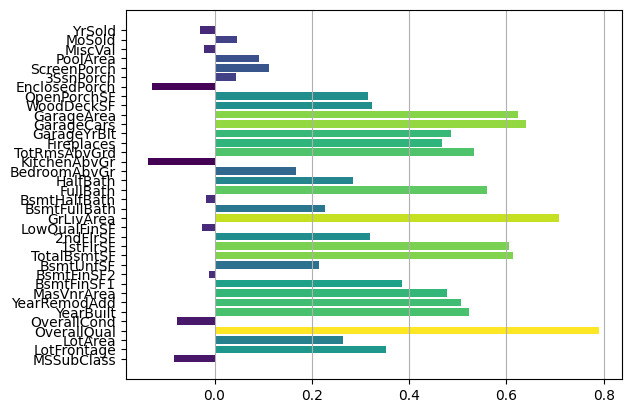

In [30]:
# Define a colormap based on the values in column SalePrice
cmap = plt.cm.get_cmap('viridis')
norm = plt.Normalize(corr_bar['SalePrice'].min(), corr_bar['SalePrice'].max())
colors = cmap(norm(corr_bar['SalePrice']))
plt.barh(corr_bar.index, corr_bar['SalePrice'], color=colors)
plt.grid(axis='x')

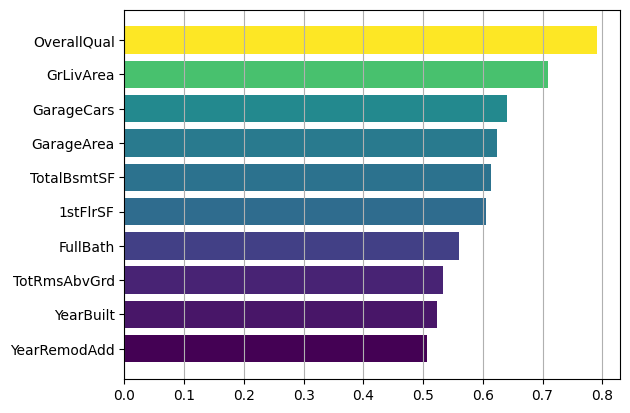

In [42]:
#Visualizing only Correlations > Threshold
threshold = 0.5
corr_bar_sale_th = corr_bar[['SalePrice']].loc[corr_bar['SalePrice'] > threshold].sort_values(by="SalePrice", ascending=True)
cmap = plt.cm.get_cmap('viridis')
norm = plt.Normalize(corr_bar_sale_th.min(), corr_bar_sale_th.max())
colors = cmap(norm(corr_bar_sale_th))
plt.barh(corr_bar_sale_th.index, corr_bar_sale_th['SalePrice'], color=colors)
plt.grid(axis='x')


In [46]:
corr_bar_sale_th.index.tolist()

['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']